In [108]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
ofertas_empleo = pd.read_csv("../csv/PARTE_1_2_df_final_limpio.csv",
                      dtype={"salario_min": "float64",
                             "salario_max": "float64",
                             "estudios": "bool",
                             "experiencia": "float64",
                             "vacaciones": "Int64"},
                      parse_dates=["fecha", "fecha_extraccion"])

In [185]:
ofertas_empleo = ofertas_empleo.drop(["id_urls", "fecha", "oferta", "fecha_extraccion", "descripcion", "empresa"], axis = 1)

# ofertas_empleo

In [188]:
ofertas_empleo["skills"] = ofertas_empleo["skills"].apply(lambda x : len(x.split(",")) if not pd.isna(x) else 0)
ofertas_empleo["tecnologias_aptitudes"] = ofertas_empleo["tecnologias_aptitudes"].apply(lambda x : len(x.split(",")) if not pd.isna(x) else 0)
ofertas_empleo["beneficios"] = ofertas_empleo["beneficios"].apply(lambda x : len(x.split(",")) if not pd.isna(x) else 0)
ofertas_empleo.idiomas = ofertas_empleo.idiomas.apply(lambda x : [y.strip() for y in x.split(",")] if not pd.isna(x) else x)
ofertas_empleo["salario_medio"] = ofertas_empleo[["salario_min", "salario_max"]].mean(axis=1)
# ofertas_empleo

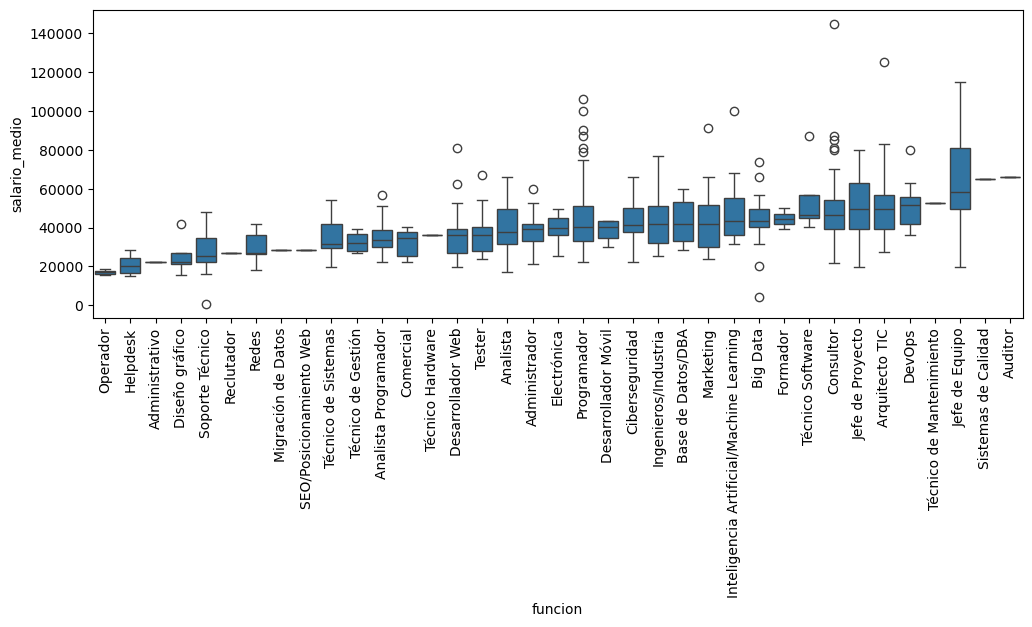

In [190]:
ofertas_groupby = ofertas_empleo.groupby(by = "funcion", as_index = False).agg({"salario_medio" : "median"}).sort_values("salario_medio").dropna()
plt.figure(figsize = (12, 4))
sns.boxplot(x = ofertas_empleo.funcion, y = ofertas_empleo.salario_medio, order = ofertas_groupby.funcion)
plt.xticks(rotation = 90)
plt.show()

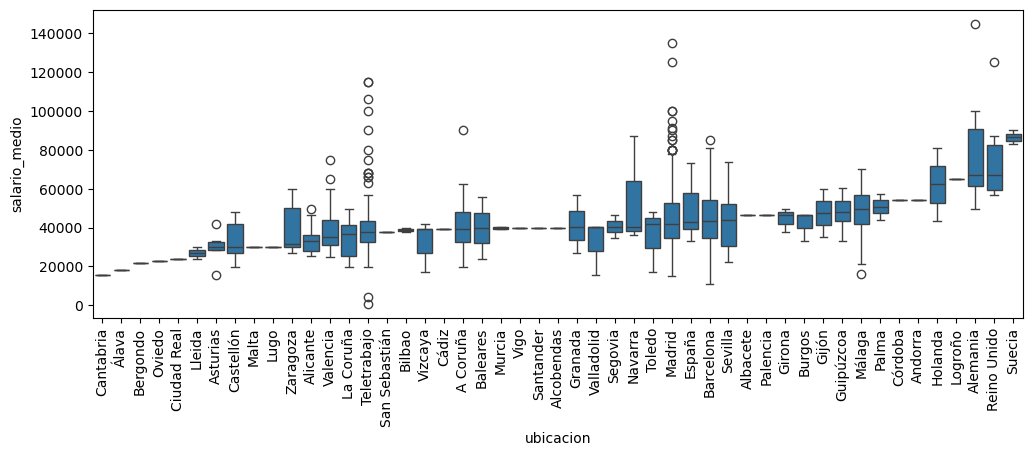

In [191]:
ofertas_empleo_2 = ofertas_empleo.copy()

ofertas_empleo_2["ubicacion"] = ofertas_empleo_2["ubicacion"].apply(lambda x : [y.strip() for y in x.split(",")] if not pd.isna(x) else x)

ofertas_empleo_2 = ofertas_empleo_2.explode("ubicacion").reset_index(drop = True)

ofertas_groupby = ofertas_empleo_2.groupby(by = "ubicacion", as_index = False).agg({"salario_medio" : "median"}).sort_values("salario_medio").dropna()

plt.figure(figsize = (12, 4))
sns.boxplot(x = ofertas_empleo_2.ubicacion, y = ofertas_empleo_2.salario_medio, order = ofertas_groupby.ubicacion)
plt.xticks(rotation = 90)
plt.show()

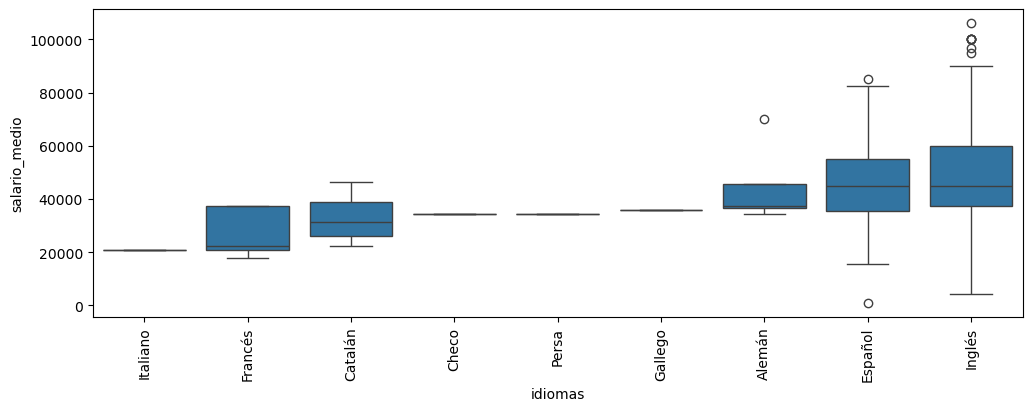

In [192]:
ofertas_empleo_2 = ofertas_empleo.copy()

# ofertas_empleo_2["idiomas"] = ofertas_empleo_2["idiomas"].apply(lambda x : [y.strip() for y in x.split(",")] if not pd.isna(x) else x)

ofertas_empleo_2 = ofertas_empleo_2.explode("idiomas").reset_index(drop = True)

ofertas_groupby = ofertas_empleo_2.groupby(by = "idiomas", as_index = False).agg({"salario_medio" : "median"}).sort_values("salario_medio").dropna()

plt.figure(figsize = (12, 4))
sns.boxplot(x = ofertas_empleo_2.idiomas, y = ofertas_empleo_2.salario_medio, order = ofertas_groupby.idiomas)
plt.xticks(rotation = 90)
plt.show()

In [194]:
map_funcion = {k : v for k,v in ofertas_empleo.groupby(by = "funcion", as_index = False).agg({"salario_medio" : "mean"}).values}

ofertas_empleo.funcion = ofertas_empleo.funcion.map(map_funcion)

In [195]:
ofertas_empleo

,funcion,salario_min,salario_max,estudios,experiencia,ubicacion,modalidad,jornada,contrato,skills,tecnologias_aptitudes,idiomas,vacaciones,beneficios,portal_empleo,salario_medio
0,34863.636364,NaN,NaN,True,3.0,Madrid,Híbrido,Jornada completa,Indefinido,0,8,[Inglés],<NA>,0,tecnoempleo,NaN
1,43795.774648,30000.0,30000.0,True,2.0,Malta,Presencial,Jornada completa,Temporal,0,8,[Inglés],<NA>,0,tecnoempleo,30000.0
2,43795.774648,NaN,NaN,True,3.0,Baleares,Híbrido,Jornada completa,Indefinido,0,11,[Inglés],<NA>,0,tecnoempleo,NaN
3,34863.636364,NaN,NaN,True,5.0,Madrid,NaN,Jornada completa,Indefinido,0,11,[Inglés],<NA>,0,tecnoempleo,NaN
4,34863.636364,27000.0,33000.0,True,2.0,Barcelona,Híbrido,Jornada completa,Indefinido,0,10,[Inglés],<NA>,0,tecnoempleo,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,NaN,45000.0,45000.0,False,NaN,NaN,Teletrabajo,NaN,NaN,0,0,NaN,24,0,getmanfred,45000.0
5232,NaN,40000.0,50000.0,False,NaN,Madrid,Híbrido,Jornada completa,NaN,0,0,NaN,28,0,getmanfred,45000.0
5233,NaN,50000.0,60000.0,False,NaN,NaN,Teletrabajo,NaN,NaN,0,0,NaN,22,0,getmanfred,55000.0
5234,NaN,40000.0,45000.0,False,NaN,NaN,Teletrabajo,Jornada completa,NaN,5,5,NaN,22,7,getmanfred,42500.0


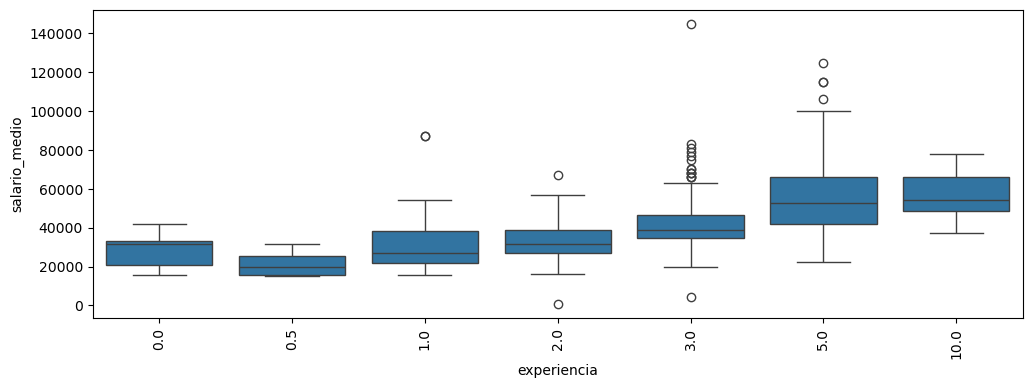

In [200]:
ofertas_empleo_2 = ofertas_empleo.copy()

# ofertas_empleo_2["idiomas"] = ofertas_empleo_2["idiomas"].apply(lambda x : [y.strip() for y in x.split(",")] if not pd.isna(x) else x)

# ofertas_empleo_2 = ofertas_empleo_2.explode("idiomas").reset_index(drop = True)

ofertas_groupby = ofertas_empleo_2.groupby(by = "experiencia", as_index = False).agg({"salario_medio" : "median"}).sort_values("experiencia").dropna()

plt.figure(figsize = (12, 4))
sns.boxplot(x = ofertas_empleo_2.experiencia, y = ofertas_empleo_2.salario_medio, order = ofertas_groupby.experiencia)
plt.xticks(rotation = 90)
plt.show()

In [4]:
ofertas_empleo["id_urls"].nunique()

5236

In [5]:
ofertas_empleo["fecha"].nunique()

321

In [6]:
ofertas_empleo["oferta"].nunique()

3648

In [7]:
ofertas_empleo["empresa"].nunique()

725

In [8]:
ofertas_empleo["funcion"].nunique()

39

In [9]:
ofertas_empleo["salario_min"].unique()

array([    nan,  30000.,  27000.,  24000.,  45000.,  36000.,  33000.,
        48000.,    500.,  49920.,  39000.,  42000.,  18000.,  21000.,
        72000.,  60000.,  16000.,  15000.,  74880.,  54000.,  62400.,
       100000.,  74000., 120000.,  84000.,   2700., 140000.,  87360.,
        80000.,  98000.,  90000.,  43000.,  12000.,  50000.,  35000.,
        55000.,  75000.,  70000.,  32000.,  40000.,  25000.,  79200.,
        20000.,  28000.,  38000.,  65000.,  10800.,  37000.,  47000.,
        59000.,  81000.,  23000.,  56000.,  34000.,  41200.,  63000.,
        46000.,  22000.,  53000., 130000.,  69000.,  85000.,   7200.,
        57000.,  95000.,  26000., 150000.])

In [10]:
ofertas_empleo["salario_max"].unique()

array([    nan,  30000.,  33000.,  45000.,  48000.,  42000.,  54000.,
        36000.,  39000.,   1200.,  49920.,  60000.,  21000.,  27000.,
        88000.,  72000.,  24000.,  18000.,  16000.,  74880.,  87360.,
        76000., 130000., 100000.,  96000.,   6000., 150000., 116000.,
        84000.,  80000.,  86000., 124800.,  94000., 102000.,  90000.,
        74000.,  62400.,  82000.,  92000.,  50000.,  15000.,  55000.,
        40000.,  53000.,  75000.,  70000.,  65000.,  35000., 114400.,
        38000.,  77000.,  37000.,  23000.,  28000.,  10800.,  47000.,
        32000.,  29000.,  62000.,  25000.,  59000.,  91000.,  43000.,
        26000.,  34000.,  56000.,  85000.,  52000.,  44000., 110000.,
        41200.,  63000.,  58000.,  57000.,  22000.,  41000.,  69000.,
        12000.,  95000.,  46000.])

In [11]:
ofertas_empleo["estudios"].unique()

array([ True, False])

In [12]:
ofertas_empleo["experiencia"].unique()

array([ 3. ,  2. ,  5. , 10. ,  0. ,  1. ,  0.5,  nan])

In [13]:
ofertas_empleo["experiencia"].isna().sum()

1280

In [14]:
ofertas_empleo["experiencia"].isna().mean() * 100

24.44614209320092

In [15]:
ofertas_empleo["ubicacion"].unique()

array(['Madrid', 'Malta', 'Baleares', 'Barcelona', 'Teletrabajo',
       'Castellón', 'Las Palmas', 'Málaga', 'Vizcaya', 'Lleida', 'Cádiz',
       'Valencia', 'La Coruña', 'Alicante', 'Guipúzcoa', 'Holanda',
       'Portugal', 'Zaragoza', 'Reino Unido', 'Dinamarca', 'Polonia',
       'Badajoz', 'Córdoba', 'Alemania', 'Bélgica', 'Suecia', 'Andorra',
       'Navarra', 'Sevilla', 'Valladolid', 'Toledo', 'Francia', 'Israel',
       'Girona', 'Almería', 'Asturias', 'Salamanca', 'Ciudad Real',
       'Granada', 'Pontevedra', 'Cantabria', 'Murcia', 'Luxemburgo',
       'Burgos', 'Rumanía', 'Italia', 'Macedonia', 'Bulgaria', 'Álava',
       'Irlanda', 'Lugo', 'España', 'Hungría', 'Albacete',
       'Santa Cruz de Tenerife', 'London', 'Chipre', 'Tarragona',
       'Grecia', 'Segovia', 'Norte Europa', 'Melilla', 'Zamora',
       'Utrecht', 'Palencia', nan, 'León', 'La Rioja', 'Huesca',
       'Guadalajara', 'Ceuta', 'A Coruña', 'Bergondo, A Coruña', 'Vigo',
       'Zaragoza, Madrid', 'Gijón', 'B

In [16]:
ofertas_empleo["modalidad"].unique()

array(['Híbrido', 'Presencial', nan, 'Remoto', 'Teletrabajo'],
      dtype=object)

In [17]:
ofertas_empleo["modalidad"].isna().sum()

1827

In [18]:
ofertas_empleo["modalidad"].isna().mean() * 100

34.893048128342244

In [19]:
ofertas_empleo["jornada"].unique()

array(['Jornada completa', 'Media jornada', 'Por horas', nan],
      dtype=object)

In [20]:
ofertas_empleo["contrato"].unique()

array(['Indefinido', 'Temporal', 'A determinar', 'Freelance/Autónomo',
       'Prácticas', 'Obra o servicio', nan], dtype=object)

In [21]:
ofertas_empleo["skills"].nunique()

842

In [22]:
ofertas_empleo["tecnologias_aptitudes"].nunique()

3889

In [23]:
ofertas_empleo["idiomas"].unique()

array(['Inglés', nan, 'Alemán,Inglés', 'Catalán', 'Español',
       'Español,Inglés', 'Catalán,Inglés', 'Inglés,Catalán', 'Alemán',
       'Español,Catalán', 'Gallego', 'Inglés,Español', 'Inglés,Alemán',
       'Francés', 'Italiano', 'Persa', 'Francés,Inglés', 'Checo',
       'Catalán,Español', 'Serbio', 'Inglés,Inglés', 'Euskera',
       'Inglés,Francés', 'Indonesio', 'Francés,Francés',
       'Inglés,Italiano', 'Español, Inglés', 'Francés, Inglés',
       'Alemán, Inglés'], dtype=object)

In [24]:
ofertas_empleo["vacaciones"].nunique()

17

In [25]:
ofertas_empleo["beneficios"].nunique()

561

In [26]:
ofertas_empleo["portal_empleo"].unique()

array(['tecnoempleo', 'getmanfred'], dtype=object)

In [27]:
ofertas_empleo["descripcion"].nunique()

5158

In [28]:
ofertas_empleo["fecha_extraccion"].nunique()

5236

In [29]:
import pandas as pd
import numpy as np

In [30]:
#VARIABLES YA NUMERICAS (SALARIO, EXPERIENCIA, ESTUDIOS)
# salario medio
ofertas_empleo["salario_medio"] = ofertas_empleo[["salario_min", "salario_max"]].mean(axis=1)

# experiencia 
ofertas_empleo["experiencia"] = ofertas_empleo["experiencia"].fillna(0)

# bool a 0 y 1
ofertas_empleo["estudios"] = ofertas_empleo["estudios"].astype(int)

In [31]:
#VARIABLES CATEGORICAS (MODALIDAD, JORNADA, CONTRATO)
# modalidad teletrabajo/remoto/híbrido
ofertas_empleo["modalidad"] = ofertas_empleo["modalidad"].replace({"Teletrabajo" : "Remoto"})
ofertas_empleo["modalidad"] = ofertas_empleo["modalidad"].fillna("Desconocido")

# jornada, rellenamos nans con desconocida
ofertas_empleo["jornada"] = ofertas_empleo["jornada"].fillna("Desconocida")

# reemplzar los que no sean obvios por "otros"
ofertas_empleo["contrato"] = ofertas_empleo["contrato"].replace({"Freelance/Autónomo" : "Otros",
                                                                 "Obra o servicio" : "Otros",
                                                                 "A determinar" : "Otros"})
ofertas_empleo["contrato"] = ofertas_empleo["contrato"].fillna("Otros")

In [32]:
#one-hot encoding de las columnas categoricas
col_categoricas = ["modalidad", "jornada", "contrato"]
col_categoricas_encoded = pd.get_dummies(ofertas_empleo[col_categoricas], prefix=col_categoricas)

**AQUI ME PREGUNTO LO DE GUARDAR LAS COSAS EN ARCHIVOS .PKL, SI HE USADO GET_DUMMIES (convirte las col categ, a binarias) NO ES NECESARIO ENTIENDO, PERO ES OBLIGARIO??, PORQUE EN EL ENUNCIADO DE ESTA PARTE NOS DICE QUE LO HAGAMOS SI APLICA PERO YO CREO QUE NO HACE FATAL NO?**

In [35]:
#variables numericas limpias
numericas = ofertas_empleo[["salario_medio", "experiencia", "estudios"]]
#concatenamos las variables numericas limpias y las variables categoricas codificadas y limpias al dataframe final
df_final_clustering = pd.concat([numericas, col_categoricas_encoded], axis=1)

In [37]:
df_final_clustering

,salario_medio,experiencia,estudios,modalidad_Desconocido,modalidad_Híbrido,modalidad_Presencial,modalidad_Remoto,jornada_Desconocida,jornada_Jornada completa,jornada_Media jornada,jornada_Por horas,contrato_Indefinido,contrato_Otros,contrato_Prácticas,contrato_Temporal
0,NaN,3.0,1,False,True,False,False,False,True,False,False,True,False,False,False
1,30000.0,2.0,1,False,False,True,False,False,True,False,False,False,False,False,True
2,NaN,3.0,1,False,True,False,False,False,True,False,False,True,False,False,False
3,NaN,5.0,1,True,False,False,False,False,True,False,False,True,False,False,False
4,30000.0,2.0,1,False,True,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,45000.0,0.0,0,False,False,False,True,True,False,False,False,False,True,False,False
5232,45000.0,0.0,0,False,True,False,False,False,True,False,False,False,True,False,False
5233,55000.0,0.0,0,False,False,False,True,True,False,False,False,False,True,False,False
5234,42500.0,0.0,0,False,False,False,True,False,True,False,False,False,True,False,False


**DUDAS:** 

**debería reemplazar los nans de salario_medio por la media de los valores de la columna verdad? para evitar problemas** vecinos knn

In [ ]:
#1/0
df_final_clustering[col_categoricas_encoded.columns] = df_final_clustering[col_categoricas_encoded.columns].astype(int)

In [ ]:
#csv
#df_final_clustering.to_csv("df_final_clustering.csv", index=False)